In [62]:
import numpy as np
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt

In [63]:
header_list = ["X1","X2","X3","X4","Y"]
data = pd.read_csv("hw2_Q5.txt", names = header_list)

#### (a). Based on the dataset, there are 3 different iris classes, Setosa, Versicolor as well as Virginica. Find a represent figure online for each different iris class.

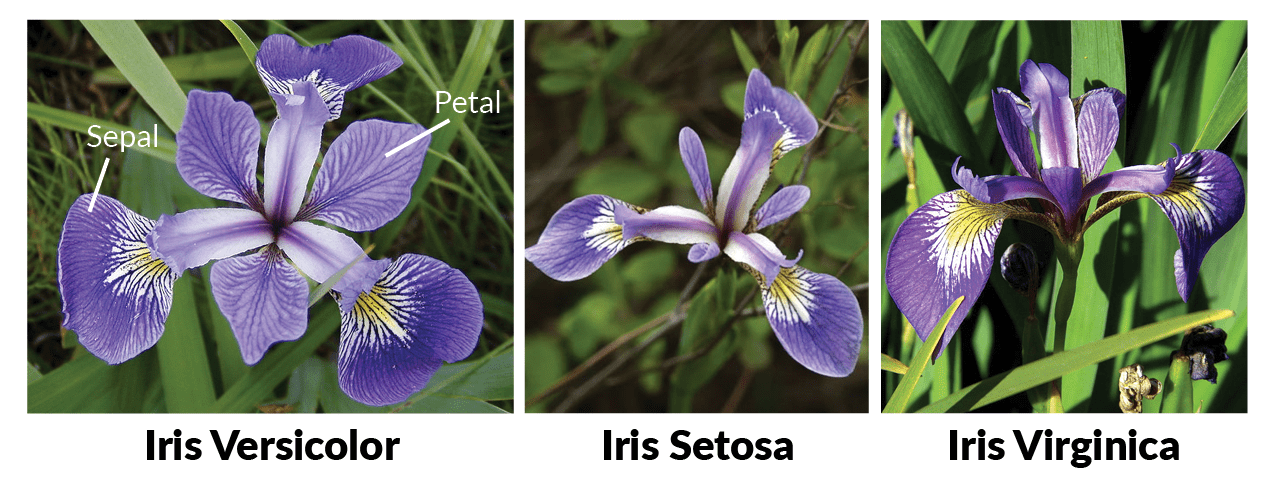

In [183]:
from IPython.display import Image
Image(filename='iris.png')

#### (b). For each feature, i.e. X1,X2,X3,X4, calculate the correlation between Xi and Y. Which feature you will discard the first and why?

In [20]:
from scipy.stats import pearsonr
corr1, _ = pearsonr(data.X1, data.Y)
corr2, _ = pearsonr(data.X2, data.Y)
corr3, _ = pearsonr(data.X3, data.Y)
corr4, _ = pearsonr(data.X4, data.Y)
print('Correlation between X1 and Y: %.3f' % corr1)
print('Correlation between X2 and Y: %.3f' % corr2)
print('Correlation between X3 and Y: %.3f' % corr3)
print('Correlation between X4 and Y: %.3f' % corr4)

Correlation between X1 and Y: 0.783
Correlation between X2 and Y: -0.419
Correlation between X3 and Y: 0.949
Correlation between X4 and Y: 0.956


I will discard X2 first, since the absolute value for the correlation between X2 and Y is the smallest, which means X2 is not so correlated with the different species.

#### (c). Normalized Xi for i = 1,2,3,4. Scatter plot (X1,X3), (X1,X4) and (X3,X4). Are the 3 different classes linearly separable?

In [90]:
from sklearn import preprocessing
import seaborn as sns
import matplotlib.patches as mpatches 

In [91]:
normalize_data = preprocessing.normalize(data)

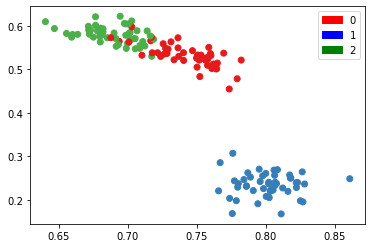

In [92]:
# Scatter plot (X1,X3)


legend_dict = { 'data1' : 'green', 'data2' : 'red', 'data3' : 'blue' }
color_labels = data['Y'].unique()
rgb_values = sns.color_palette("Set1", 3)
colors = dict(zip(color_labels, rgb_values))

plt.scatter(normalize_data[:,0],normalize_data[:,2],c=data["Y"].map(colors))
red_patch = mpatches.Patch(color='red', label='0')
blue_patch = mpatches.Patch(color='blue', label='1')
green_patch = mpatches.Patch(color='green', label='2')
plt.legend(handles=[red_patch, blue_patch, green_patch])

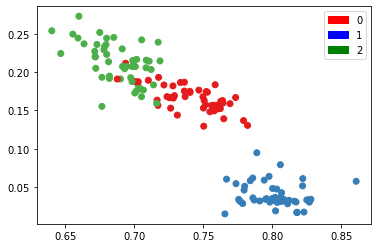

In [93]:
# Scatter plot (X1,X4)
plt.scatter(normalize_data[:,0],normalize_data[:,3],c=data.Y.map(colors))
red_patch = mpatches.Patch(color='red', label='0')
blue_patch = mpatches.Patch(color='blue', label='1')
green_patch = mpatches.Patch(color='green', label='2')
plt.legend(handles=[red_patch, blue_patch, green_patch])

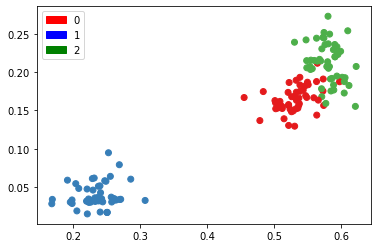

In [94]:
# Scatter plot (X3,X4)
plt.scatter(normalize_data[:,2],normalize_data[:,3],c=data.Y.map(colors))
red_patch = mpatches.Patch(color='red', label='0')
blue_patch = mpatches.Patch(color='blue', label='1')
green_patch = mpatches.Patch(color='green', label='2')
plt.legend(handles=[red_patch, blue_patch, green_patch])

In [189]:
normalize_data = pd.DataFrame(normalize_data)

Versicolor(Y equals to 1) is linearly seperatable with the other two types. However, the other two types are not linearly seperatable.

#### (d). Perform the Decision Tree classifier without constraint on the maximum depth, the KNN classifier with K = 3, the SVM classifier with γ = 2 and C = 1, the Naive Bayes classifier, and the AdaBoost with 30 Decision Tree classifiers with maximum depth 3. Plot the 3 ×5 = 15 decision surfaces of the 5 classifiers trained on these 3 pairs of features of the iris dataset and report 5 ×3 = 15 scores respectively. Compare and summarize the advantage and disadvantage of each classifier, together with the figures you find in part (a).

x1 (sepal length (cm)) and x3 (petal length (cm)) Score: 0.993
x1 (sepal length (cm)) and x4 (petal width (cm)) Score: 0.973
x3 (petal length (cm)) and x4 (petal width (cm)) Score: 0.993


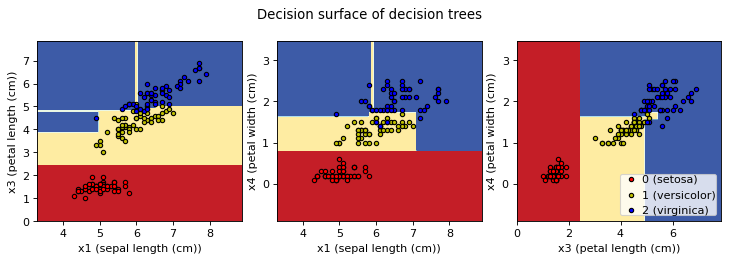

In [188]:
# Decision Tree

from matplotlib.pyplot import figure
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

target_names=['0 (setosa)', '1 (versicolor)', '2 (virginica)']
feature_names= ['x1 (sepal length (cm))', 'x2 (sepal width (cm))', 'x3 (petal length (cm))', 'x4 (petal width (cm))']

# Parameters
n_classes = 3
plot_colors = 'ryb'
plot_step = 0.02

figure(figsize=(10, 6), dpi=80)

for pairidx, pair in enumerate([[0, 2], [0, 3], [2, 3]]):
    # We only take the two corresponding features
    X = data.iloc[:, pair]
    y = data.Y
    clf = DecisionTreeClassifier().fit(X, y)
    plt.subplot(2, 3, pairidx + 1)
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=3.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    yhat = clf.predict(X)
    print(feature_names[pair[0]],'and',feature_names[pair[1]],'Score: %.3f' % accuracy_score(y, yhat))
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(feature_names[pair[0]])
    plt.ylabel(feature_names[pair[1]])
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)[0]
        
        plt.scatter(
            X.iloc[idx, 0],
            X.iloc[idx, 1],
            c=color,
            label=target_names[i],
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )
   

plt.suptitle("Decision surface of decision trees")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")

x1 (sepal length (cm)) and x3 (petal length (cm)) Score: 0.953
x1 (sepal length (cm)) and x4 (petal width (cm)) Score: 0.967
x3 (petal length (cm)) and x4 (petal width (cm)) Score: 0.980


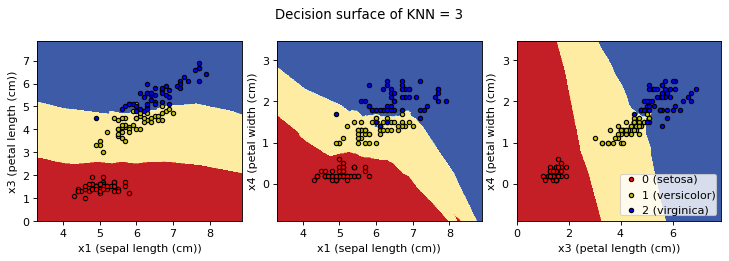

In [178]:
# KNN = 3

from matplotlib.pyplot import figure
from sklearn import neighbors

target_names=['0 (setosa)', '1 (versicolor)', '2 (virginica)']
feature_names= ['x1 (sepal length (cm))', 'x2 (sepal width (cm))', 'x3 (petal length (cm))', 'x4 (petal width (cm))']

# Parameters
n_classes = 3
plot_colors = 'ryb'
plot_step = 0.02

figure(figsize=(10, 6), dpi=80)

for pairidx, pair in enumerate([[0, 2], [0, 3], [2, 3]]):
    # We only take the two corresponding features
    X = data.iloc[:, pair]
    y = data.Y
    clf = neighbors.KNeighborsClassifier(3).fit(X, y)
    plt.subplot(2, 3, pairidx + 1)
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=3.5)
    
    yhat = clf.predict(X)
    print(feature_names[pair[0]],'and',feature_names[pair[1]],'Score: %.3f' % accuracy_score(y, yhat))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(feature_names[pair[0]])
    plt.ylabel(feature_names[pair[1]])
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)[0]
        
        plt.scatter(
            X.iloc[idx, 0],
            X.iloc[idx, 1],
            c=color,
            label=target_names[i],
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )
   

plt.suptitle("Decision surface of KNN = 3")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")

x1 (sepal length (cm)) and x3 (petal length (cm)) Score: 0.967
x1 (sepal length (cm)) and x4 (petal width (cm)) Score: 0.967
x3 (petal length (cm)) and x4 (petal width (cm)) Score: 0.967


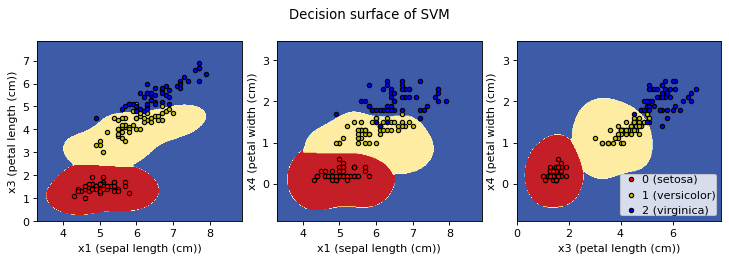

In [179]:
# SVM

from matplotlib.pyplot import figure
from sklearn.svm import SVC

target_names=['0 (setosa)', '1 (versicolor)', '2 (virginica)']
feature_names= ['x1 (sepal length (cm))', 'x2 (sepal width (cm))', 'x3 (petal length (cm))', 'x4 (petal width (cm))']

# Parameters
n_classes = 3
plot_colors = 'ryb'
plot_step = 0.02

figure(figsize=(10, 6), dpi=80)

for pairidx, pair in enumerate([[0, 2], [0, 3], [2, 3]]):
    # We only take the two corresponding features
    X = data.iloc[:, pair]
    y = data.Y
    clf = SVC(gamma=2,C=1).fit(X, y)
    plt.subplot(2, 3, pairidx + 1)
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=3.5)
    
    yhat = clf.predict(X)
    print(feature_names[pair[0]],'and',feature_names[pair[1]],'Score: %.3f' % accuracy_score(y, yhat))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(feature_names[pair[0]])
    plt.ylabel(feature_names[pair[1]])
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)[0]
        
        plt.scatter(
            X.iloc[idx, 0],
            X.iloc[idx, 1],
            c=color,
            label=target_names[i],
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )
   

plt.suptitle("Decision surface of SVM")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")

x1 (sepal length (cm)) and x3 (petal length (cm)) Score: 0.913
x1 (sepal length (cm)) and x4 (petal width (cm)) Score: 0.960
x3 (petal length (cm)) and x4 (petal width (cm)) Score: 0.960


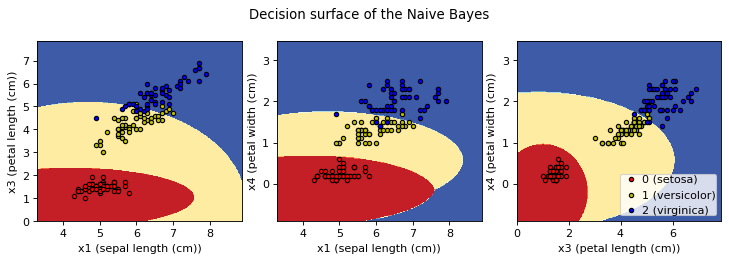

In [180]:
# The Naive Bayes

from sklearn.naive_bayes import GaussianNB
from matplotlib.pyplot import figure


target_names=['0 (setosa)', '1 (versicolor)', '2 (virginica)']
feature_names= ['x1 (sepal length (cm))', 'x2 (sepal width (cm))', 'x3 (petal length (cm))', 'x4 (petal width (cm))']

# Parameters
n_classes = 3
plot_colors = 'ryb'
plot_step = 0.02

figure(figsize=(10, 6), dpi=80)

for pairidx, pair in enumerate([[0, 2], [0, 3], [2, 3]]):
    # We only take the two corresponding features
    X = data.iloc[:, pair]
    y = data.Y
    clf = GaussianNB().fit(X, y)
    plt.subplot(2, 3, pairidx + 1)
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=3.5)
    
    yhat = clf.predict(X)
    print(feature_names[pair[0]],'and',feature_names[pair[1]],'Score: %.3f' % accuracy_score(y, yhat))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(feature_names[pair[0]])
    plt.ylabel(feature_names[pair[1]])
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)[0]
        
        plt.scatter(
            X.iloc[idx, 0],
            X.iloc[idx, 1],
            c=color,
            label=target_names[i],
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )
   

plt.suptitle("Decision surface of the Naive Bayes")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")

x1 (sepal length (cm)) and x3 (petal length (cm)) Score: 0.993
x1 (sepal length (cm)) and x4 (petal width (cm)) Score: 0.973
x3 (petal length (cm)) and x4 (petal width (cm)) Score: 0.993


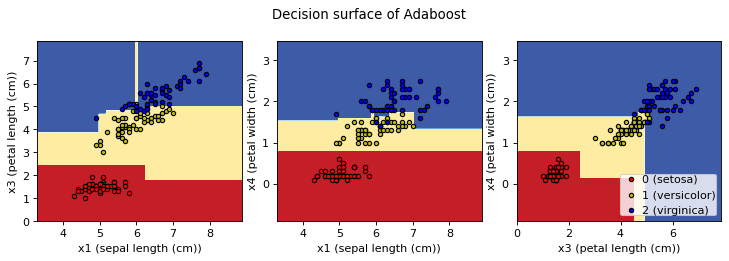

In [181]:
# AdaBoostClassifier

from sklearn.ensemble import AdaBoostClassifier
from matplotlib.pyplot import figure


target_names=['0 (setosa)', '1 (versicolor)', '2 (virginica)']
feature_names= ['x1 (sepal length (cm))', 'x2 (sepal width (cm))', 'x3 (petal length (cm))', 'x4 (petal width (cm))']

# Parameters
n_classes = 3
plot_colors = 'ryb'
plot_step = 0.02

figure(figsize=(10, 6), dpi=80)

for pairidx, pair in enumerate([[0, 2], [0, 3], [2, 3]]):
    # We only take the two corresponding features
    X = data.iloc[:, pair]
    y = data.Y
    clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3), n_estimators=30).fit(X, y)
    plt.subplot(2, 3, pairidx + 1)
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=3.5)
    
    yhat = clf.predict(X)
    print(feature_names[pair[0]],'and',feature_names[pair[1]],'Score: %.3f' % accuracy_score(y, yhat))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(feature_names[pair[0]])
    plt.ylabel(feature_names[pair[1]])
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)[0]
        
        plt.scatter(
            X.iloc[idx, 0],
            X.iloc[idx, 1],
            c=color,
            label=target_names[i],
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )
   

plt.suptitle("Decision surface of Adaboost")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")